## Comparing WRF Outputs with and without Urban Canopy Modeling (UCM) ###
I ran WRF center around Sacramento with Domain 1 with 4km grid size 1000km wide EW and NS. Domain 2 with 1 km grid size 200km by 200km.<br>
The forecasts are made for Jan 1st 2025-00:00:00 to Jan 2nd 2025-00:00:00.<br>
The run without UCM took about 10-minutes to forecast each hour.<br>
The run with UCM took about 35-minutes to forecast each hour. About 3.5X longer. <br>

### Initial Test Run Results
I ran WRF with and without UCM for only 1 day of forecast.<br>
To look at the results, I am going open the last forecast file 2025-01-02:00:00:00<br>
I am going to make filled contours of the surface level pressure first to see if they make sense.<br>

### In Code box 1 (Domain 2)
This produced the surface level pressure in hPa for domain 2 of the forecast.<br>
The figure on the left is with UCM and the right is without.<br>
The high pressure seem to spread farther south without(right) UCM.<br>

### In Code box 2 (Domain 2)
This produced the surface level pressure in hPa for domain 1 of the forecast.<br>
The figure on the left is with UCM and the right is without.<br>
There's no substantial difference between the two.<br>


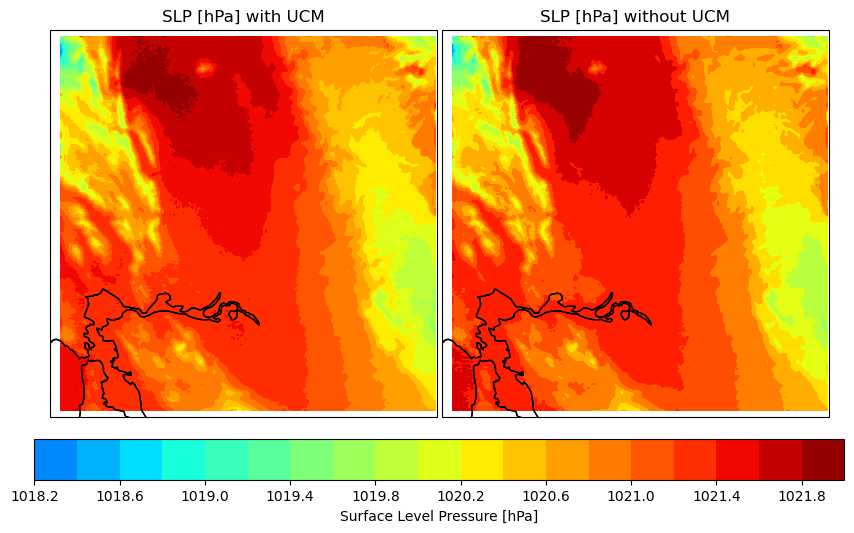

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords
import cartopy as cp

# Open the NetCDF file
ncfile = Dataset("/data/wto/WRFOUT/run_20250327_Cali_Sacr_2Dom_WithUCM/wrfout_d02_2025-01-02_00:00:00")
ncfileNoUCM = Dataset("/data/wto/WRFOUT/run_20250326_Cali_Sacr_2Dom_NoUCM/wrfout_d02_2025-01-02_00:00:00")

# Extract the surface level pressure
slp = getvar(ncfile, "slp")
slpNoUCM = getvar(ncfileNoUCM, "slp")

# Get projection and coordinates
wrf_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(slp).min(), to_np(slpNoUCM).min()))
#print(vmin)
vmax = np.ceil(max(to_np(slp).max(), to_np(slpNoUCM).max()))
#print(vmax)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.5}, figsize=(14, 6))

# Reduce extra margins
fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot (With UCM)
ax1.set_title("SLP [hPa] with UCM")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(slp), 20, transform=cp.crs.PlateCarree(), cmap="jet", vmin=vmin, vmax=vmax)
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)

# Second contour plot (Without UCM)
ax2.set_title("SLP [hPa] without UCM")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(slpNoUCM), 20, transform=cp.crs.PlateCarree(), cmap="jet", vmin=vmin, vmax=vmax)
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.09, pad=0.05)
cbar.set_label("Surface Level Pressure [hPa]")

plt.show()

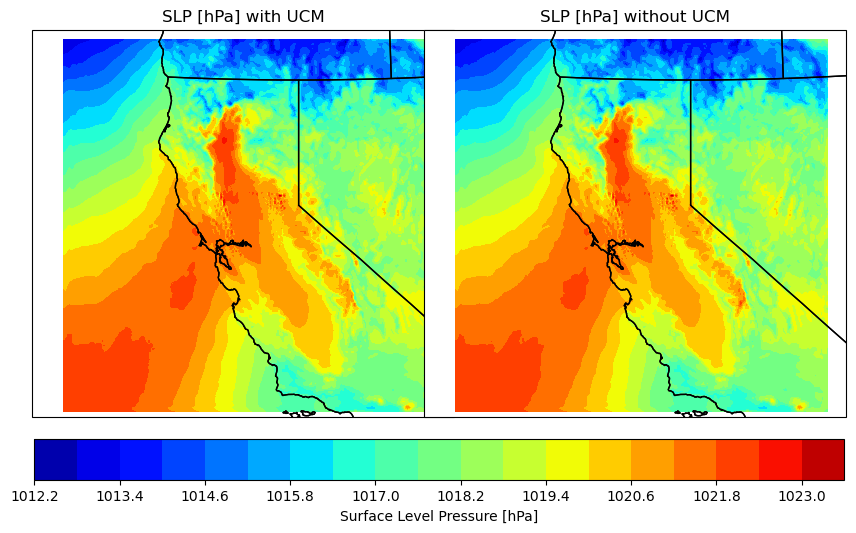

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords
import cartopy as cp

# Open the NetCDF file
ncfile = Dataset("/data/wto/WRFOUT/run_20250327_Cali_Sacr_2Dom_WithUCM/wrfout_d01_2025-01-02_00:00:00")
ncfileNoUCM = Dataset("/data/wto/WRFOUT/run_20250326_Cali_Sacr_2Dom_NoUCM/wrfout_d01_2025-01-02_00:00:00")

# Extract the surface level pressure
slp = getvar(ncfile, "slp")
slpNoUCM = getvar(ncfileNoUCM, "slp")

# Get projection and coordinates
wrf_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(slp).min(), to_np(slpNoUCM).min()))
#print(vmin)
vmax = np.ceil(max(to_np(slp).max(), to_np(slpNoUCM).max()))
#print(vmax)

# Create figure with minimal whitespace
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.5}, figsize=(14, 6))

# Reduce extra margins
fig.subplots_adjust(left=0.08, right=0.92, top=0.90, bottom=0.15)

# First contour plot (With UCM)
ax1.set_title("SLP [hPa] with UCM")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(slp), 20, transform=cp.crs.PlateCarree(), cmap="jet", vmin=vmin, vmax=vmax)
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)

# Second contour plot (Without UCM)
ax2.set_title("SLP [hPa] without UCM")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(slpNoUCM), 20, transform=cp.crs.PlateCarree(), cmap="jet", vmin=vmin, vmax=vmax)
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)

# Add shared colorbar spanning only the width of both plots
cbar = fig.colorbar(contour1, ax=[ax1, ax2], orientation="horizontal", fraction=0.09, pad=0.05)
cbar.set_label("Surface Level Pressure [hPa]")

plt.show()